<center>
<div class="alert alert-block alert-info">
    <h1> </h1>
    <h1><font size="+3"> <b> Math340 HW06 </b> </font></h1>
    <h1><font size="+3"> <b> Programming in Mathematics </b> </font></h1>
    <h1><font size="+3"> <b> Due  3/17/25</b> </font></h1>
    
</div>
</center>

<br>



<center>
<font size="+2">
Department of Mathematics and Statistics <br> <br>
San Diego State University <br> <br>
Spring 2025
</font>
</center>








## Your Name: Victor Allen

## Your ID: 132107570

## 1. Summary

Question 1: Found the First and Fourth taylor series for the $e^x$ function, then plotted both. Also calculated the error for both series and plotted those.

Question 2: Did the math as instructed with two different dts, $y_0 = 1$ and $\epsilon = .01$

Question 3: Created a function that returns an array of 6 unique double digit numbers, with three even and three odd numbers.

Question 4: Did the same b = 3 * a + 1 array function with CuPy arrays to evaluate its perfomance improvements.




## 2. Methodology

Question 1: I found the first and fourth taylor series of the indicated function using the definition, then I created a 2*2 plot, and plotted each taylor series and the function in two of the panels. In the other two panels I computed the error using the defenition abs(actual - observed) / actual and plotted those in the other two panels with appropriate labels.

Question 2: He needs to ask better programming question because I had no idea what he wanted me to do, I did my best to follow the math and set the values I was not given to reasonable values. Basically what I observed is that even though the mean value may be the same, decreasing the dt value decreases the variance.

Question 3: Allocated a list with all possible 2 digit numbers, 10 - 99. Then allocated a list for the selected values and set the counts for even and odd numbers to zero. Set a loop to iterate 6 times, and randomly chose a number from the list. If the number of evens or odds was not to be exceeded by insterting this number, the tracker was incremented, the number inserted into the selected list and removed from the list of possible numbers. If the tracking variables did get above 3, a different number was selected and the process was repeated until a number was inserted into the selected list.

Question 4: All I did was go to Colab and import CuPy into in the program. Then I added the same logic as numpy to the function using CuPy methods instead, and added the output to the final table, and ran the cell using T4. Interestlingy Cupy performs worse than numpy in smaller array sizes, but signifigantly outperforms it all other methods in larger array sizes.

## 3. Code and Results (e.g., Tables, Figures, Outputs)

### Question 1

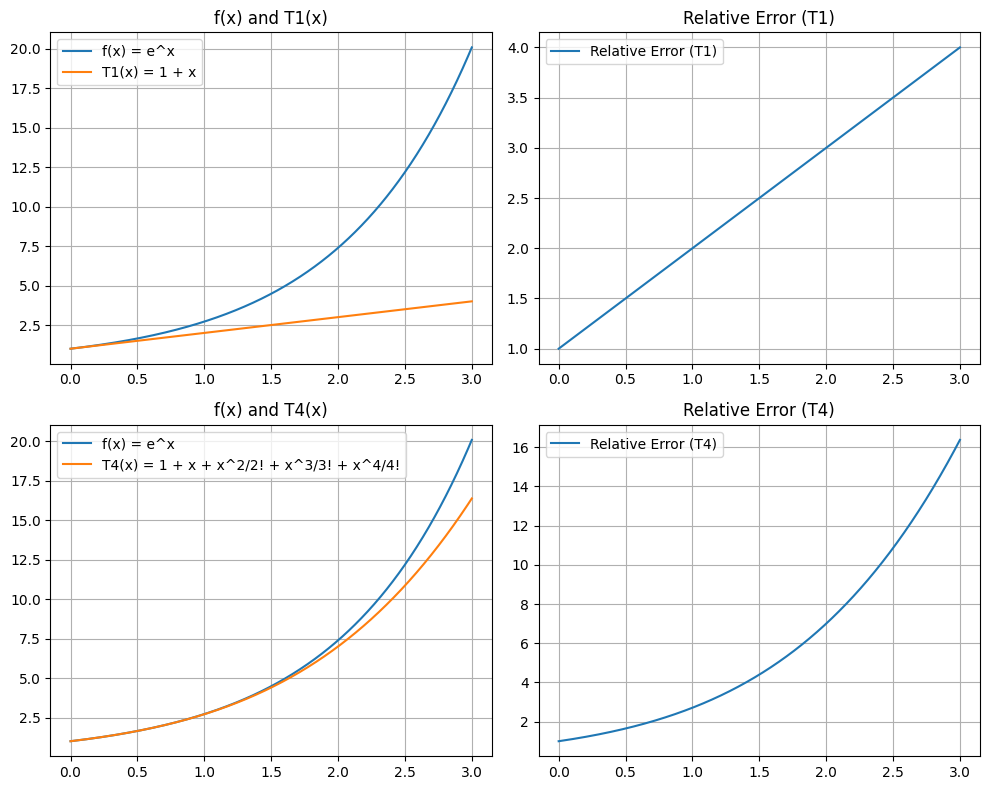

In [ ]:
# Question 1
# Add your code for Question 1 here (inside a code cell)
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x)

def f1(x):
    return 1 + x

def f4(x):
    return 1 + x + (x**2/2) + (x**3/6) + (x**4/24)


x = np.linspace(0,3,1000)

exp = f(x)

firstTaylor = f1(x)

fourthTaylor = f4(x)

errT1 = np.abs(exp - firstTaylor) / np.abs(exp)

errT4 = np.abs(exp - fourthTaylor) / np.abs(exp)

fig, axes = plt.subplots(2,2,figsize = (10,8))

axes[0, 0].plot(x, exp, label='f(x) = e^x')
axes[0, 0].plot(x, firstTaylor, label='T1(x) = 1 + x')
axes[0, 0].set_title("f(x) and T1(x)")
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].plot(x, firstTaylor, label='Relative Error (T1)')
axes[0, 1].set_title("Relative Error (T1)")
axes[0, 1].legend()
axes[0, 1].grid(True)

axes[1, 0].plot(x, exp, label='f(x) = e^x')
axes[1, 0].plot(x, fourthTaylor, label='T4(x) = 1 + x + x^2/2! + x^3/3! + x^4/4!')
axes[1, 0].set_title("f(x) and T4(x)")
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].plot(x, fourthTaylor, label='Relative Error (T4)')
axes[1, 1].set_title("Relative Error (T4)")
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()



# Run the cell to display your results

### Question 2

In [3]:
import numpy as np

sigma = .2

y0 = 1

eps = .01

tMax = 10

dtValues = [.001,1]

for dt in dtValues:
  print(f"dt = {dt}")

  t = np.arange(0, tMax + dt, dt)

  yC = y0 * np.exp(sigma * t)
  yP = (y0 + eps) * np.exp(sigma * t)

  ratioC = yC[1:] / yC[:-1]
  sigmaCEst = np.log(ratioC) / dt

  ratioP = yP[1:] / yP[:-1]
  sigmaPEst = np.log(ratioP) / dt

  diffArray = (yP - yC) / eps

  validIdx = np.where(t > 0 )[0]

  tValid = t[validIdx]

  diffValid = diffArray[validIdx]

  sigmaDiffEst = np.log(diffValid) / tValid

  meanSigmaC = np.mean(sigmaCEst)
  meanSigmaP = np.mean(sigmaPEst)
  meanSigmaDiff = np.mean(sigmaDiffEst)

  varSigmaC = np.var(sigmaCEst)
  varSigmaP = np.var(sigmaPEst)
  varSigmaDiff = np.var(sigmaDiffEst)

  print(f"  Using y_c: mean={meanSigmaC:.5f}, var={varSigmaC:.5e}")
  print(f"  Using y_p: mean={meanSigmaP:.5f}, var={varSigmaP:.5e}")
  print(f"  Using (y_p - y_c)/eps: mean={meanSigmaDiff:.5f}, var={varSigmaDiff:.5e}")
  print()








dt = 0.001
  Using y_c: mean=0.20000, var=2.52083e-26
  Using y_p: mean=0.20000, var=2.83216e-26
  Using (y_p - y_c)/eps: mean=0.20000, var=8.58371e-27

dt = 1
  Using y_c: mean=0.20000, var=9.86076e-33
  Using y_p: mean=0.20000, var=9.32150e-33
  Using (y_p - y_c)/eps: mean=0.20000, var=5.07328e-30



### Question 3

In [ ]:
import random

numbers = list(range(10, 100))
selected = []

numOdd = 0
numEven = 0

for i in range(6):
    while True:
        chosen = random.choice(numbers)

        if chosen % 2 == 0:
            if numEven < 3:
                selected.append(chosen)
                numbers.remove(chosen)
                numEven += 1
                break
        else:
            if numOdd < 3:
                selected.append(chosen)
                numbers.remove(chosen)
                numOdd += 1
                break

print(selected)

[77, 36, 83, 71, 64, 76]


### Question 4

In [1]:
#! pip install tabulate
import numpy as np
import time
from tabulate import tabulate  # Import tabulate to format the output into a table
import cupy as cp

# Function to compute the time taken for each method
def compute_time(array_size):
    # Create a large array using Python lists
    a_list = list(range(array_size))

    # Create a large array using NumPy
    a_numpy = np.arange(array_size)

    # Create a large array using CuPy
    a_cupy = cp.arange(array_size)

    # Using loop to compute b = 3 * a + 1
    start_time = time.time()
    b_loop = []
    for element in a_list:
        b_loop.append(3 * element + 1)
    loop_time = time.time() - start_time

    # Using NumPy arrays to compute b = 3 * a + 1
    start_time = time.time()
    b_numpy = 3 * a_numpy + 1
    numpy_time = time.time() - start_time

    # Using in-place arithmetic to compute b = 3 * a + 1
    start_time = time.time()
    a_numpy *= 3
    a_numpy += 1
    inplace_time = time.time() - start_time

    # Using CuPy arrays to compute b = 3 * a + 1
    start_time = time.time()
    b_cupy = 3 * a_cupy + 1
    cupy_time = time.time() - start_time

    return [array_size, loop_time, numpy_time, inplace_time, cupy_time]

# Table headers
headers = ["Array Size", "Time using Loop", "Time using NumPy", "Time using In-place Arithmetic", "Time using CuPy"]

# Array sizes to test
array_sizes = [10**6, 10**7]

# Generate the table
table_data = []
for size in array_sizes:
    table_data.append(compute_time(size))

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------+-------------------+--------------------+----------------------------------+-------------------+
|   Array Size |   Time using Loop |   Time using NumPy |   Time using In-place Arithmetic |   Time using CuPy |
+==============+===================+====================+==================================+===================+
|      1000000 |         0.0858476 |         0.00860167 |                       0.00168991 |        0.279657   |
+--------------+-------------------+--------------------+----------------------------------+-------------------+
|     10000000 |         0.874425  |         0.035579   |                       0.0208042  |        0.00117683 |
+--------------+-------------------+--------------------+----------------------------------+-------------------+
